<a href="https://colab.research.google.com/github/karyapoormohamadie/stock_market_model/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [39]:
now = str(datetime.datetime.now())[:10]
target= 'AMZN'
date = '2018-01-01'

df = yf.download(target,date,now,interval='1d')

[*********************100%***********************]  1 of 1 completed


In [40]:
df

Price,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,
2018-01-02,59.450500,59.500000,58.525501,58.599998,53890000
2018-01-03,60.209999,60.274502,59.415001,59.415001,62176000
2018-01-04,60.479500,60.793499,60.233002,60.250000,60442000
2018-01-05,61.457001,61.457001,60.500000,60.875500,70894000
2018-01-08,62.343498,62.653999,61.601501,61.799999,85590000
...,...,...,...,...,...
2025-02-10,233.139999,233.919998,229.199997,230.550003,35419900
2025-02-11,232.759995,233.440002,230.130005,231.919998,23713700


In [41]:
df.columns = ['Close','High','Low','Open','Volume']

In [42]:
import requests
url = f'https://www.alphavantage.co/query?function=RSI&symbol={target}&interval=daily&time_period=5&series_type=close&apikey=OHY3DST217RX6SV7'
response = requests.get(url)
rsi = response.json()

In [44]:
rsi_data = pd.DataFrame.from_dict(rsi['Technical Analysis: RSI'] , orient='index')
rsi_data = rsi_data[rsi_data.index >= date]
rsi_data['RSI'] = rsi_data['RSI'].astype(np.float64)

In [43]:
rsi_data

,RSI
2025-02-14,35.7921
2025-02-13,40.6000
2025-02-12,34.6128
2025-02-11,44.0630
2025-02-10,45.0390
...,...
2018-01-08,87.6820
2018-01-05,83.1650
2018-01-04,75.1156
2018-01-03,72.1820


In [45]:
rsi_data.index = pd.to_datetime(rsi_data.index)

In [46]:
data = pd.concat([df,rsi_data],axis=1 )

In [47]:
data.isna().sum()

,0
Close,0
High,0
Low,0
Open,0
Volume,0
RSI,0


In [48]:
data.describe()

,Close,High,Low,Open,Volume,RSI
count,1791.000000,1791.000000,1791.000000,1791.000000,1.791000e+03,1791.000000
mean,130.994557,132.551304,129.362067,131.021726,7.540847e+07,54.152148
std,40.660614,41.029127,40.288066,40.676460,3.980628e+07,19.705654
min,59.450500,59.500000,58.525501,58.599998,1.500750e+07,4.543600
25%,93.056751,94.039997,91.681999,92.897251,4.884700e+07,39.275950
50%,128.399994,130.389999,126.739998,128.820007,6.472600e+07,54.678800
75%,164.593002,166.256256,162.798500,164.749748,9.081010e+07,69.491150
max,242.059998,242.520004,238.029999,239.020004,3.113460e+08,96.223700


<Axes: >

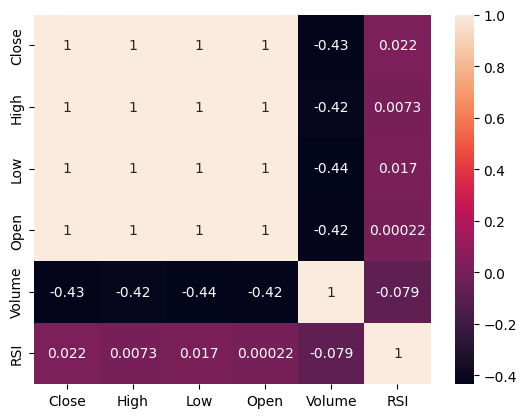

In [49]:
sns.heatmap(data.corr(),annot=True)

In [50]:
data = data.sort_index()
data

,Close,High,Low,Open,Volume,RSI
2018-01-02,59.450500,59.500000,58.525501,58.599998,53890000,62.1117
2018-01-03,60.209999,60.274502,59.415001,59.415001,62176000,72.1820
2018-01-04,60.479500,60.793499,60.233002,60.250000,60442000,75.1156
2018-01-05,61.457001,61.457001,60.500000,60.875500,70894000,83.1650
2018-01-08,62.343498,62.653999,61.601501,61.799999,85590000,87.6820
...,...,...,...,...,...,...
2025-02-10,233.139999,233.919998,229.199997,230.550003,35419900,45.0390
2025-02-11,232.759995,233.440002,230.130005,231.919998,23713700,44.0630
2025-02-12,228.929993,231.179993,228.160004,230.460007,32285200,34.6128
2025-02-13,230.369995,230.419998,227.520004,228.850006,31346500,40.6000


<Axes: ylabel='Volume'>

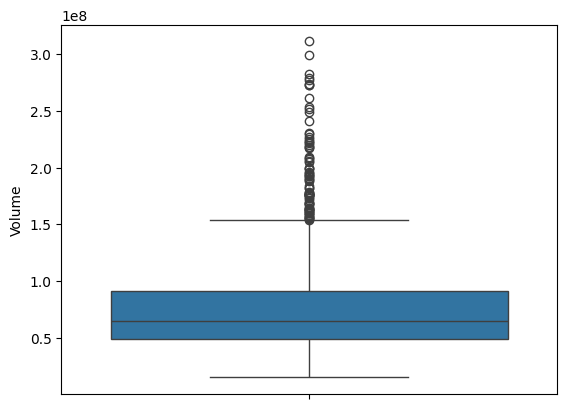

In [51]:
sns.boxplot(data['Volume'])

In [52]:
import plotly.graph_objects as go

In [53]:
def tracer(Y):
  fig = go.Figure()
  fig.add_trace(go.Scatter(x=data.index,y=Y,mode='lines'))

  fig.show()

In [54]:
tracer(data['Open'])

In [18]:
tracer(data['Close'])

In [55]:
test_lengh = data[(data.index > '2023-01-01')].shape[0]
test_lengh

532

In [56]:
def create_featurs(data,feature_length):

  x=[]
  y=[]

  for i in range(len(data) - feature_length):
    x.append(data.iloc[i : i + feature_length].values)
    y.append(data['Close'].values[i + feature_length])

  x = np.array(x)
  y = np.array(y)

  return x,y



In [57]:
x , y = create_featurs(data,32)

In [58]:
x_train , x_test , y_train , y_test = x[:-test_lengh] , x[-test_lengh:] ,y[:-test_lengh] , y[-test_lengh:]

In [59]:
from sklearn.preprocessing import  MinMaxScaler

class MultiDimentionScaler():
  def __init__(self):
    self.scalers = []

  def fit_transform(self , X):
    total_dim = X.shape[2]
    for i in range(total_dim):
      Scaler = MinMaxScaler()
      X[:,:,i] = Scaler.fit_transform(X[:,:,i])
      self.scalers.append(Scaler)
    return X

  def transform(self,X):
    for i in range(X.shape[2]):
      X[:,:,i] = self.scalers[i].transform(X[:,:,i])
    return X



In [60]:
feature_scaler = MultiDimentionScaler()

x_train = feature_scaler.fit_transform(x_train)
x_test = feature_scaler.transform(x_test)


In [61]:
target_scaler = MinMaxScaler()
y_train = target_scaler.fit_transform(y_train.reshape(-1,1))
y_test = target_scaler.transform(y_test.reshape(-1,1))


In [62]:
def save(obj ,name:str):
  path = open(f'{name}.pck','wb')
  pickle.dump(obj,path)
  path.close

def load(obj,name):
  path = open(f'{name}.pck','rb')
  lo = pickle.load(path)
  return lo

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
from tensorflow.keras.callbacks import ModelCheckpoint , ReduceLROnPlateau

checkpoint = ModelCheckpoint('/content/drive/MyDrive/checkpoint/model.weights.h5',monitor = 'val_loss',mode='min',save_best_only=True,save_weights_only=True)
learn_rate_reducer = ReduceLROnPlateau(factor = 0.25,patience=3,min_lr=0.0001)

In [65]:
x_train.shape

(1227, 32, 6)

In [66]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf


model = Sequential()

model.add(layers.Input((32,6)))

model.add(layers.Bidirectional(layers.LSTM(512,return_sequences=True,recurrent_dropout=0.1)))
model.add(layers.LSTM(256,recurrent_dropout=0.1))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64,activation='elu'))
model.add(layers.Dense(32,activation='elu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(32,activation='elu'))
model.add(layers.Dense(1,activation='linear'))




In [67]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.005),loss='mse')

In [68]:
model.fit(x_train,y_train
          ,epochs=18,
          verbose=1,
          batch_size=1,
          validation_data=(x_test,y_test),
          callbacks=[checkpoint,learn_rate_reducer],
          shuffle=False)

Epoch 1/18
1227/1227 ━━━━━━━━━━━━━━━━━━━━ 190s 153ms/step - loss: 0.0042 - val_loss: 0.6725 - learning_rate: 0.0050
Epoch 2/18
1227/1227 ━━━━━━━━━━━━━━━━━━━━ 200s 152ms/step - loss: 0.0031 - val_loss: 0.7387 - learning_rate: 0.0050
Epoch 3/18
1227/1227 ━━━━━━━━━━━━━━━━━━━━ 217s 164ms/step - loss: 0.0030 - val_loss: 0.7303 - learning_rate: 0.0050
Epoch 4/18
1227/1227 ━━━━━━━━━━━━━━━━━━━━ 200s 163ms/step - loss: 0.0032 - val_loss: 0.7384 - learning_rate: 0.0050
Epoch 5/18
1227/1227 ━━━━━━━━━━━━━━━━━━━━ 192s 154ms/step - loss: 0.0079 - val_loss: 0.4211 - learning_rate: 0.0012
Epoch 6/18
1227/1227 ━━━━━━━━━━━━━━━━━━━━ 213s 164ms/step - loss: 0.0108 - val_loss: 0.3160 - learning_rate: 0.0012
Epoch 7/18
1227/1227 ━━━━━━━━━━━━━━━━━━━━ 204s 166ms/step - loss: 0.0089 - val_loss: 0.2374 - learning_rate: 0.0012
Epoch 8/18
1227/1227 ━━━━━━━━━━━━━━━━━━━━ 259s 164ms/step - loss: 0.0074 - val_loss: 0.1838 - learning_rate: 0.0012
Epoch 9/18
1227/1227 ━━━━━━━━━━━━━━━━━━━━ 202s 164ms/step - loss: 0.0065

In [69]:
model.load_weights('/content/drive/MyDrive/checkpoint/model.weights.h5')
prediction = model.predict(x_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step


In [70]:
prediction = target_scaler.inverse_transform(prediction)
actual = target_scaler.inverse_transform(y_test)

In [71]:
prediction.shape,prediction[0]

((532, 1), array([88.24823], dtype=float32))

In [72]:
prediction = np.squeeze(prediction,axis=1)
actual = np.squeeze(actual,axis=1)

In [73]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=data.index[-test_lengh:],y=prediction , mode='lines',name='predicted'))
fig.add_trace(go.Scatter(x=data.index[-test_lengh:],y=actual , mode='lines',name='actual'))

fig.show()